In [1]:
import pandas as pd

In [18]:
#import seaborn as sns
#import xlrd
import random
import matplotlib.pyplot as plt
#import geopandas as gpd
#sns.set_style("whitegrid")

In [19]:

#from shapely.geometry import Point

In [63]:
df = pd.read_csv("Data.csv",index_col=0)


In [4]:
df.head(10)

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,Physical Injury,25/03/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,Physical Injury,03/04/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,Physical Injury,01/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,Physical Injury,07/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,Physical Injury,08/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LP22DS72LE,http://thehimalayantimes.com/fullNews.php?head...,Police on 16 May arrested a 43-year-old man of...,Opportunist,Attempted,Police,Physical Injury,16/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
MA88GP02AH,http://nepalpolice.gov.np/2013-06-09-10-53-36....,"Kamalesh Shah (15) of Sitamadi, India, current...",Child,Raped,Police,Physical Injury,05/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XT54XX52NQ,http://nepalpolice.gov.np/2013-06-19-11-52-51....,"The Metropolitan Police Circle, Kalimati, on 1...",Child,Raped,Police,Physical Injury,19/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LT42OQ97BA,http://nepalpolice.gov.np/2013-06-21-09-27-17....,Police on 21 June had arrested Shyam Lal Shres...,Child,Raped,Police,Physical Injury,21/06/2013,Kathmandu,"27.55752119624532, 85.0217998274353"


### Impact assesment: analysis of the "Consequences of the attack " column to understand the short and long term impacts on survivors of and their communities.This can hilight the need for support systems and rehabilitation services.

In [26]:
#consequences_df = df['Consequences of the attack'].str.get_dummies(', ')
#df["Consequences"] = df["Consequences of the attack"].astype("category").cat.codes
#consequences_df['Districts'] = df['Districts']
#df = pd.concat([df, consequences_df], axis=1)
#consequence_columns = ['Physical Injury', 'Murder', 'Pregnant']
#df['Total Consequences'] = df[consequence_columns].sum(axis=1)

In [27]:
df.head(20)

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,Physical Injury,25/03/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,Physical Injury,03/04/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,Physical Injury,01/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,Physical Injury,07/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,Physical Injury,08/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LP22DS72LE,http://thehimalayantimes.com/fullNews.php?head...,Police on 16 May arrested a 43-year-old man of...,Opportunist,Attempted,Police,Physical Injury,16/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
MA88GP02AH,http://nepalpolice.gov.np/2013-06-09-10-53-36....,"Kamalesh Shah (15) of Sitamadi, India, current...",Child,Raped,Police,Physical Injury,05/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XT54XX52NQ,http://nepalpolice.gov.np/2013-06-19-11-52-51....,"The Metropolitan Police Circle, Kalimati, on 1...",Child,Raped,Police,Physical Injury,19/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LT42OQ97BA,http://nepalpolice.gov.np/2013-06-21-09-27-17....,Police on 21 June had arrested Shyam Lal Shres...,Child,Raped,Police,Physical Injury,21/06/2013,Kathmandu,"27.55752119624532, 85.0217998274353"


In [28]:
df['Districts']
df.head(70)
#consequences_df = df['Consequences of the attack'].str.get_dummies(', ')
#consequences_df['Districts'] = df['Districts']

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,Physical Injury,25/03/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,Physical Injury,03/04/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,Physical Injury,01/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,Physical Injury,07/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,Physical Injury,08/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
...,...,...,...,...,...,...,...,...,...
VR48XK39HE,http://nepalpolice.gov.np/2014-07-18-08-57-56....,"Police had arrested Suresh Bhatta (24), Deepak...",Gang,Raped,Police,Physical Injury,17/07/2014,Kanchanpur,"28.839299762331823, 80.32165271565319"
DB70JU37ZS,http://myrepublica.com/portal/index.php?action...,"Police have arrested Dhan Bahadur Gurung, 23,...",Child,Raped,Police,Physical Injury,21/07/2014,Gorkha,"28.839299762331823, 80.32165271565319"
UZ07GT27QX,http://nepalpolice.gov.np/2014-07-23-10-52-32....,A person was arrested on charge of raping a 10...,Child,Raped,Victim Mother,Physical Injury,22/07/2014,Kathmandu,"28.2992196143429, 84.85610534181566"


In [29]:
#df.head()

In [5]:
consequences_counts = df['Consequences of the attack'].value_counts()


In [6]:
plt.figure(figsize=(10, 6))
plt.bar(consequences_counts.index, consequences_counts.values)
plt.xlabel('Consequences of the attack')
plt.ylabel('Districts')
plt.title('Distribution of Consequences')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

In [32]:
df["Consequences of the attack"].unique()

array(['Physical Injury ', 'Physical injury ', 'Physical injury',
       'mentally ill', 'Murder', 'Physical Injury', 'Pregnant',
       'physical Injury', 'pregnant ', 'death', 'murder', 'Murdered',
       'Physical Attack', ' pregnent', nan, ' Physical Injury ',
       ' murder', 'pregnant'], dtype=object)

In [33]:
df["Consequences of the attack"]=df["Consequences of the attack"].str.lower()
df["Consequences of the attack"]=df["Consequences of the attack"].str.strip()
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("murdered","murder")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("physical attack","physical Injury")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("pregnent","pregnant")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("dearth","death")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("mantally ill","Mentally ill")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("physical injury","physical Injury")

In [34]:
df["Consequences of the attack"].unique()

array(['physical Injury', 'mentally ill', 'murder', 'pregnant', 'death',
       nan], dtype=object)

In [75]:
len(df["Districts"].unique())

77

In [68]:
df["Districts"]=df["Districts"].str.lower()
df["Districts"]=df["Districts"].str.strip()
df["Districts"]=df["Districts"].str.replace("kaverepalanchowk","kavrepalanchok")
df["Districts"]=df["Districts"].str.replace("sunsary","sunsari")
df["Districts"]=df["Districts"].str.replace("rupendhi","rupandehi")
df["Districts"]=df["Districts"].str.replace("terahathum","terhathum")
df["Districts"]=df["Districts"].str.replace("solukhubmu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("tehrathum","terhathum")
df["Districts"]=df["Districts"].str.replace("terathum","terhathum")
df["Districts"]=df["Districts"].str.replace("rupandahi","rupandehi")
df["Districts"]=df["Districts"].str.replace("rupandhi","rupandehi")
df["Districts"]=df["Districts"].str.replace("sindupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindupalchowk","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalachok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhhupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhuplchwok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhuplchowk","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalchwok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("mohattari","mahottari")
df["Districts"]=df["Districts"].str.replace("ruoendehi","rupandehi")
df["Districts"]=df["Districts"].str.replace("rupendehi","rupandehi")
df["Districts"]=df["Districts"].str.replace("western rukum","rukum")
df["Districts"]=df["Districts"].str.replace("rukum west, karnali","rukum")
df["Districts"]=df["Districts"].str.replace("rukum \(west\)","rukum")
df["Districts"]=df["Districts"].str.replace("rukum west","rukum")
df["Districts"]=df["Districts"].str.replace("rukum east","rukum")
df["Districts"]=df["Districts"].str.replace("kabhrepalanchok","kavre")
df["Districts"]=df["Districts"].str.replace("kavrepalanchock","kavre")
df["Districts"]=df["Districts"].str.replace("kaverepalanchok","kavre")
df["Districts"]=df["Districts"].str.replace("kavrepalanchok","kavre")
df["Districts"]=df["Districts"].str.replace("bhojur","bhojpur")
df["Districts"]=df["Districts"].str.replace("sayangja","syangja")
df["Districts"]=df["Districts"].str.replace("sayanja","syangja")
df["Districts"]=df["Districts"].str.replace("panchathar","panchthar")
df["Districts"]=df["Districts"].str.replace("pachthar","panchthar")
df["Districts"]=df["Districts"].str.replace("tahanu","tanahu")
df["Districts"]=df["Districts"].str.replace("tanahun","tanahu")
df["Districts"]=df["Districts"].str.replace("udhayapur","udayapur")
df["Districts"]=df["Districts"].str.replace("udaypur","udayapur")
df["Districts"]=df["Districts"].str.replace("udaipur","udayapur")
df["Districts"]=df["Districts"].str.replace("ilam","illam")
df["Districts"]=df["Districts"].str.replace("kapilbastu","kapilvastu")
df["Districts"]=df["Districts"].str.replace("bardia","bardiya")
df["Districts"]=df["Districts"].str.replace("dailekh","dailekh")
df["Districts"]=df["Districts"].str.replace("taplegunj","taplejung")
df["Districts"]=df["Districts"].str.replace("dolkha","dolakha")
df["Districts"]=df["Districts"].str.replace("nawaparasi west","nawalparasi")
df["Districts"]=df["Districts"].str.replace("nawalparasi west","nawalparasi")
df["Districts"]=df["Districts"].str.replace("nawalparasi east","nawalparasi")
df["Districts"]=df["Districts"].str.replace("pratappur","nawalparasi")
df["Districts"]=df["Districts"].str.replace("sapatari","saptari")
df["Districts"]=df["Districts"].str.replace("chitawan","chitwan")
df["Districts"]=df["Districts"].str.replace("solukhumbhu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("solukhubmu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("shankhuwasabha","sankhuwasabha")
df["Districts"]=df["Districts"].str.replace("bakya","banke")
df["Districts"]=df["Districts"].str.replace("rampur, palpa","palpa")
df["Districts"]=df["Districts"].str.replace("gandaki, parbat","parbat")
df["Districts"]=df["Districts"].str.replace("gandaki, myagdi","myagdi")
df["Districts"]=df["Districts"].str.replace("karnali, dailekh","dailekh")
df["Districts"]=df["Districts"].str.replace("mades,bara","bara")
df["Districts"]=df["Districts"].str.replace("kritipur","kathmandu")
df["Districts"]=df["Districts"].str.replace("okheldunga","okhaldhunga")
df["Districts"]=df["Districts"].str.replace("mades,bara","bara")
df["Districts"]=df["Districts"].str.replace("birgunj","parsa")
df["Districts"]=df["Districts"].str.replace("hetauda","makwanpur")
df["Districts"]=df["Districts"].str.replace("pokhara","kaski")
df["Districts"]=df["Districts"].str.replace("itahari","sunsari")
df["Districts"]=df["Districts"].str.replace("lumbini","rupandehi")
df["Districts"]=df["Districts"].str.replace("dharan","sunsari")
df["Districts"]=df["Districts"].str.replace("bardibas","mahottari")
df["Districts"]=df["Districts"].str.replace("dhanusha","dhanusa")
df["Districts"]=df["Districts"].str.replace("madi","chitwan")

C:\Users\Bishesh Kafle\AppData\Local\Temp\ipykernel_10912\2300343643.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Districts"]=df["Districts"].str.replace("rukum \(west\)","rukum")


In [73]:
df[df["Districts"] == 'sudurpachim']

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
SS16MI03XR,https://pahilopost.com/content/20210715085231....,"Maya, a 15-year-old girl with intellectual dis...",Child,Raped,Police,Physical Injury,15/07/2021,sudurpachim,NaN


In [70]:
df["Districts"].unique()

array(['kathmandu', 'siraha', 'jhapa', 'rautahat', 'mahottari', 'sunsari',
       'rupandehi', 'morang', 'sindhupalchowk', 'khotang', 'rukum',
       'palpa', 'lamjung', 'gulmi', 'kavre', 'kaski', 'banke', 'bara',
       'bhaktapur', 'pyuthan', 'sarlahi', 'bhojpur', 'terhathum', 'dang',
       'syangja', 'kailali', 'kanchanpur', 'gorkha', 'dadeldhura',
       'dhanusa', 'panchthar', 'sindhuli', 'tanahu', 'udayapur',
       'makwanpur', 'illam', 'rasuwa', 'kapilvastu', 'baglung', 'bardiya',
       'jajarkot', 'lalitpur', 'dailekh', 'myagdi', 'arghakhanchi',
       'taplejung', 'dolakha', 'nawalparasi', 'darchula', 'salyan',
       'surkhet', 'parsa', 'parbat', 'saptari', 'kalikot', 'chitwan',
       'baitadi', 'bajura', 'nuwakot', 'bajhang', 'jumla', 'solukhumbu',
       'mugu', 'dhading', 'dhankuta', 'doti', 'achham', 'okhaldhunga',
       'ramechhap', 'mustang', 'dolpa', 'sankhuwasabha', nan, 'humla',
       'rolpa', 'manang', 'sudurpachim'], dtype=object)

In [71]:
len(df["Districts"].unique())

77

In [45]:
df

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,physical Injury,25/03/2013,kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,physical Injury,03/04/2013,kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,physical Injury,01/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,physical Injury,07/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,physical Injury,08/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
...,...,...,...,...,...,...,...,...,...
VQ02QJ16IA,https://nepalmonitor.org/reports/view/41875,One person has been arrested on charges of rap...,Opportunist,Rape,Police,physical Injury,14/06/2023,lalitpur,"27.662405818404125, 85.32435296718468"
OS92RX27HN,https://nepalpolice.gov.np/news/3741/,"Baglung, a 17-year-old boy living in Nisikhola...",Child,Rape,Police,physical Injury,09/07/2023,baglung,"28.28119980900559, 83.58164488651326"
LW75CB63DB,https://nepalpolice.gov.np/news/3746/,"Jhapa, 31-year-old Dhan Kumar Limbu, resident ...",Opportunist,Rape,Police,physical Injury,07/02/2023,jhapa,"26.577739181619766, 87.89718581504616"


In [46]:
df.dropna(inplace = True)

In [47]:
df.reset_index()

,Reference number,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
0,CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,physical Injury,25/03/2013,kathmandu,"27.7199745185167, 85.32344429728326"
1,XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,physical Injury,03/04/2013,kathmandu,"27.7199745185167, 85.32344429728326"
2,IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,physical Injury,01/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
3,IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,physical Injury,07/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
4,ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,physical Injury,08/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
...,...,...,...,...,...,...,...,...,...,...
1898,VQ02QJ16IA,https://nepalmonitor.org/reports/view/41875,One person has been arrested on charges of rap...,Opportunist,Rape,Police,physical Injury,14/06/2023,lalitpur,"27.662405818404125, 85.32435296718468"
1899,OS92RX27HN,https://nepalpolice.gov.np/news/3741/,"Baglung, a 17-year-old boy living in Nisikhola...",Child,Rape,Police,physical Injury,09/07/2023,baglung,"28.28119980900559, 83.58164488651326"
1900,LW75CB63DB,https://nepalpolice.gov.np/news/3746/,"Jhapa, 31-year-old Dhan Kumar Limbu, resident ...",Opportunist,Rape,Police,physical Injury,07/02/2023,jhapa,"26.577739181619766, 87.89718581504616"
1901,KH48LW89IO,https://nepalpolice.gov.np/news/3767/,"Baglung, Police arrested 28-year-old Bimal Ham...",Opportunist,Rape,Police,physical Injury,12/07/2023,baglung,"28.28104863825078, 83.58215987061996"


In [49]:
count_data = df.groupby(['Districts', 'Consequences of the attack']).size().unstack(fill_value=0)

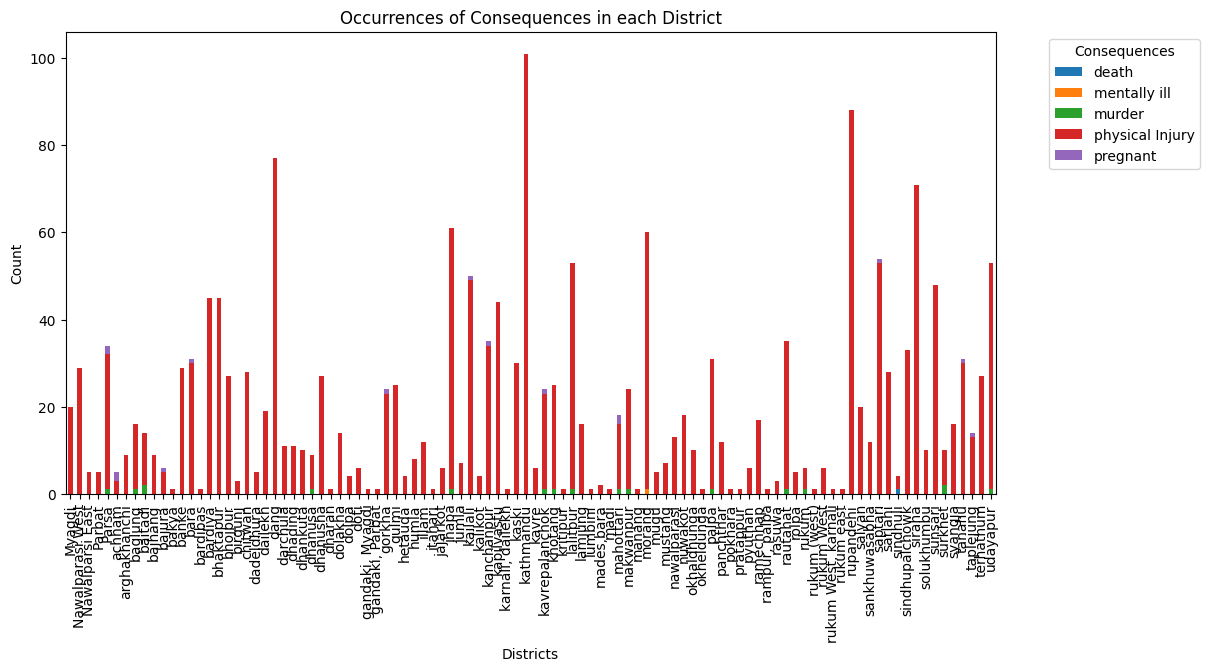

In [50]:
count_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Districts')
plt.ylabel('Count')
plt.title('Occurrences of Consequences in each District')
plt.legend(title='Consequences', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [38]:
desired_consequences = ['physical injury','mentally ill','murder', 'pregnant','death']
filtered_df = df[df['Consequences of the attack'].isin(desired_consequences)]


In [39]:
#g = sns.FacetGrid(filtered_df, col='Consequences of the attack', height=5, aspect=1.2)

In [40]:
consequences_by_district = filtered_df.groupby(['Districts', 'Consequences of the attack']).size().reset_index(name='count')

In [41]:
#g = sns.FacetGrid(consequences_by_district, col='Consequences of the attack', height=5, aspect=1.2)
g = sns.FacetGrid(consequences_by_district, col='Consequences of the attack', col_wrap=3, height=4, aspect=1.2, sharex=False)

NameError: name 'sns' is not defined

In [42]:
g.map(sns.barplot, 'Districts','count', order=consequences_by_district['Districts'].unique())
g.set_xticklabels(rotation=90)

NameError: name 'g' is not defined

In [43]:

g.set_axis_labels('Districts','Count')
g.fig.suptitle('Consequences by District', y=1.02)

NameError: name 'g' is not defined

In [44]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>